# Employee Attrition Prediction - Regression Model
This notebook demonstrates step-by-step regression modeling using `employee_attrition.csv` dataset.
We use Linear Regression for prediction.

## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 2: Load Dataset

In [2]:
df = pd.read_csv('employee_attrition.csv')
df.head()

,EmployeeID,Age,Salary,YearsAtCompany,JobSatisfaction,Attrition
0,1,25,30000,1,2,1
1,2,30,40000,3,3,0
2,3,45,80000,10,4,0
3,4,35,50000,5,2,1
4,5,40,70000,7,3,0


## Step 3: Dataset Information

In [3]:
print('Shape:', df.shape)
print('\nInfo:')
print(df.info())
print('\nDescribe:')
print(df.describe())

Shape: (20, 6)

Info:
<class 'pandas.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   EmployeeID       20 non-null     int64
 1   Age              20 non-null     int64
 2   Salary           20 non-null     int64
 3   YearsAtCompany   20 non-null     int64
 4   JobSatisfaction  20 non-null     int64
 5   Attrition        20 non-null     int64
dtypes: int64(6)
memory usage: 1.1 KB
None

Describe:
       EmployeeID        Age        Salary  YearsAtCompany  JobSatisfaction  \
count    20.00000  20.000000     20.000000       20.000000        20.000000   
mean     10.50000  35.950000  55750.000000        6.450000         3.050000   
std       5.91608   8.756802  22531.556818        5.062504         1.234376   
min       1.00000  23.000000  28000.000000        1.000000         1.000000   
25%       5.75000  28.750000  34500.000000        2.000000         2.000000   
50%    

## Step 4: Handle Missing Values

In [4]:
df = df.dropna()
print('Missing values removed')

Missing values removed


## Step 5: Convert Categorical Columns to Numeric

In [5]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
df.head()

,EmployeeID,Age,Salary,YearsAtCompany,JobSatisfaction,Attrition
0,1,25,30000,1,2,1
1,2,30,40000,3,3,0
2,3,45,80000,10,4,0
3,4,35,50000,5,2,1
4,5,40,70000,7,3,0


## Step 6: Select Features and Target

In [6]:
# Using last column as target
target = df.columns[-1]
X = df.drop(target, axis=1)
y = df[target]
print('Target column:', target)

Target column: Attrition


## Step 7: Split Data into Training and Testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training size:', X_train.shape)
print('Testing size:', X_test.shape)

Training size: (16, 5)
Testing size: (4, 5)


## Step 8: Train Linear Regression Model

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Model trained successfully')

Model trained successfully


## Step 9: Make Predictions

In [9]:
y_pred = model.predict(X_test)
print('Predictions:', y_pred[:10])

Predictions: [ 0.98880587  0.75431584 -0.21549862  0.57640034]


## Step 10: Evaluate Regression Model

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 0.10979075571824218
R2 Score: 0.5608369771270313


## Step 11: Visualization

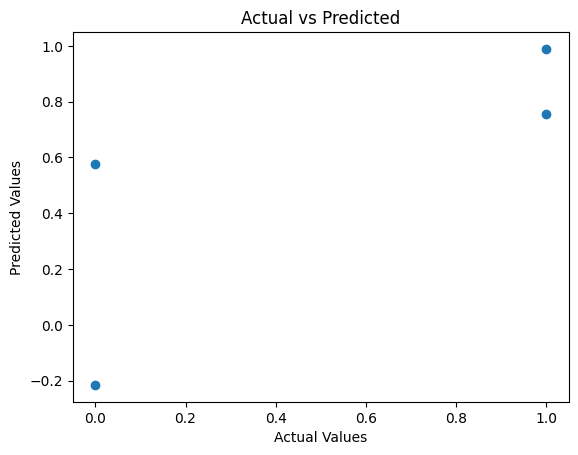

In [11]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()